In [1]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, fpgrowth

In [2]:
import pandas as pd

# 讀取Excel文件
data = pd.read_excel('交易資料.xlsx')

# 移除數量欄位中小於1的資料
data = data[data['QUANTITY'] >= 1]

data.head

<bound method NDFrame.head of         INVOICE_NO  CUST_ID   ITEM_ID                   ITEM_NO  \
0       CX47348203     3218   3217532            M25P40-VMN6TPB   
1       CX47346522     2470   3326781      AU80610006237AASLBX9   
2       CX47348534    16135    740487              MMBD2837LT1G   
4       CX47346184     2356     70072              MMBT3906LT1G   
6       CX47347899    10228   3420352               TMP103AYFFR   
...            ...      ...       ...                       ...   
157389   216071271     2100  14691206             74HCT365D,653   
157390   216075314     2197   3249493               74HC04D,653   
157391   216072287     2579    133619           74LVC2G17GW,125   
157392   216077517    43262  15231095  MT41K256M16TW-107:P TRAY   
157395   216070810    47302  14852949        MT41K64M16TW-107:J   

          PRODUCT_TYPE   TRX_DATE  QUANTITY  
0       MEMORY_EMBEDED 2016-07-26      2500  
1            CPU / MPU 2016-07-11        50  
2             DISCRETE 2016

In [3]:
data.info

<bound method DataFrame.info of         INVOICE_NO  CUST_ID   ITEM_ID                   ITEM_NO  \
0       CX47348203     3218   3217532            M25P40-VMN6TPB   
1       CX47346522     2470   3326781      AU80610006237AASLBX9   
2       CX47348534    16135    740487              MMBD2837LT1G   
4       CX47346184     2356     70072              MMBT3906LT1G   
6       CX47347899    10228   3420352               TMP103AYFFR   
...            ...      ...       ...                       ...   
157389   216071271     2100  14691206             74HCT365D,653   
157390   216075314     2197   3249493               74HC04D,653   
157391   216072287     2579    133619           74LVC2G17GW,125   
157392   216077517    43262  15231095  MT41K256M16TW-107:P TRAY   
157395   216070810    47302  14852949        MT41K64M16TW-107:J   

          PRODUCT_TYPE   TRX_DATE  QUANTITY  
0       MEMORY_EMBEDED 2016-07-26      2500  
1            CPU / MPU 2016-07-11        50  
2             DISCRETE 20

In [4]:
# 確認每個欄位的空值數量
print(data.isnull().sum())

INVOICE_NO      0
CUST_ID         0
ITEM_ID         0
ITEM_NO         0
PRODUCT_TYPE    0
TRX_DATE        0
QUANTITY        0
dtype: int64


In [5]:
unique_product_types = data['PRODUCT_TYPE'].unique()

print(unique_product_types)

['MEMORY_EMBEDED' 'CPU / MPU' 'DISCRETE' 'LINEAR IC' 'OPTICAL AND SENSOR'
 'CHIPSET / ASP' 'LOGIC IC' 'MEMORY_SYSTEM' 'PEMCO' 'OTHERS']


In [6]:
# 計算每種產品類型的出現次數
product_type_counts = data['PRODUCT_TYPE'].value_counts()

# 計算每種產品類型的出現比例
product_type_proportions = product_type_counts / len(data)

print(product_type_proportions)

PRODUCT_TYPE
DISCRETE              0.323556
LINEAR IC             0.259817
PEMCO                 0.102835
LOGIC IC              0.097495
OTHERS                0.068622
CPU / MPU             0.050552
MEMORY_EMBEDED        0.035976
OPTICAL AND SENSOR    0.029541
CHIPSET / ASP         0.022540
MEMORY_SYSTEM         0.009066
Name: count, dtype: float64


In [7]:
Rel_map = {'DISCRETE':1 ,
           'LINEAR IC':2 ,
           'PEMCO':3 ,
           'LOGIC IC':4 ,
           'OTHERS':5,
           'CPU / MPU':6,
           'MEMORY_EMBEDED':7,
           'OPTICAL AND SENSOR':8,
           'CHIPSET / ASP':9,
           'MEMORY_SYSTEM':10}

data['PRODUCT_TYPE'] = data['PRODUCT_TYPE'].map(Rel_map).astype('int64')

In [8]:
# 計算每種產品類型的出現次數
product_type_counts = data['PRODUCT_TYPE'].value_counts()

# 計算每種產品類型的出現比例
product_type_proportions = product_type_counts / len(data)

print(product_type_proportions)

PRODUCT_TYPE
1     0.323556
2     0.259817
3     0.102835
4     0.097495
5     0.068622
6     0.050552
7     0.035976
8     0.029541
9     0.022540
10    0.009066
Name: count, dtype: float64


In [9]:
# 計算每種產品的出現次數
product_type_counts = data['ITEM_NO'].value_counts()

# 計算每種產品的出現比例
product_type_proportions = product_type_counts / len(data)

print(product_type_proportions)

ITEM_NO
LM3564A1TMX/NOPB-CF     0.003710
TPS65730A0PYFFR-CF      0.003664
LM3638A1YFDR-CF         0.003539
BAV99,215               0.003485
CSD68822F4-CF           0.003477
                          ...   
510650200               0.000008
BX80660E52695V4SR2J1    0.000008
NB2305AI1DG             0.000008
LM385MX-1.2/NOPB        0.000008
TXB0106PWR              0.000008
Name: count, Length: 23710, dtype: float64


In [10]:
# 移除'ITEM_ID'欄位，因為ITEM_NO和ITEM_ID表示的是同一個東西
data = data.drop('ITEM_ID', axis=1)

In [11]:
# 計算每單購買的物品數量，並刪除購買數量為1的(沒有關聯規則可以挖)
invoice_counts = data['INVOICE_NO'].value_counts()

values = invoice_counts[invoice_counts > 1].index

filtered_data = data[data['INVOICE_NO'].isin(values)]

invoice_counts = filtered_data['INVOICE_NO'].value_counts()

In [12]:
import numpy as np
# 計算每種產品類型的出現次數
product_type_counts = data['ITEM_NO'].value_counts()

# 計算每種產品類型的出現比例
product_type_proportions = product_type_counts / len(data)

Q1 = np.percentile(product_type_proportions.values, 70)
Q2 = np.percentile(product_type_proportions.values, 80)
Q3 = np.percentile(product_type_proportions.values, 90)

print("後面設定min support時會用到")
print("前30%:", Q1)
print("前20%:", Q2)
print("前10%:", Q3)

後面設定min support時會用到
前30%: 3.1046981845277364e-05
前20%: 4.6570472767916046e-05
前10%: 8.537920007451275e-05


In [13]:
Asspciative_ls = []
for i in (invoice_counts.keys()):
    selected_data = filtered_data[filtered_data['INVOICE_NO'] == i]['ITEM_NO']
    Asspciative_ls.append(selected_data.values)

In [14]:
# Encode成np矩陣，並做成pd df
Asspciative_ls = [[str(item) for item in transaction] for transaction in Asspciative_ls]

te = TransactionEncoder()
te_arr = te.fit(Asspciative_ls).transform(Asspciative_ls)

result_df = pd.DataFrame(te_arr, columns=te.columns_)

In [15]:
# Apriori for min support
from time import time
from mlxtend.frequent_patterns import association_rules

save = False

percentile = [2e-3, 2.25e-3, 2.5e-3, 2.75e-3, 3e-3]
totle_time = [0, 0, 0, 0, 0]
rules_cnt = [0, 0, 0, 0, 0]
for k in range(5):
    s_time = time()
    freq_itemsets = apriori(result_df, min_support=percentile[k], use_colnames=True)

    # 檢查冗餘規則
    rules = association_rules(freq_itemsets, min_threshold=0.7)

    redundant_rules = set()
    for i in range(len(rules)):
        for j in range(i+1, len(rules)):
            if rules.iloc[i]['antecedents'].issubset(rules.iloc[j]['antecedents']) and \
            rules.iloc[i]['consequents'] == rules.iloc[j]['consequents']:
                redundant_rules.add(rules.iloc[i].name)

    filtered_rules = rules.drop(index=redundant_rules)
    e_time = time()

    if save:
        filtered_rules.to_csv(f"filtered_rules_{k}.csv")
    rules_cnt[k] = len(filtered_rules)
    totle_time[k] = e_time - s_time

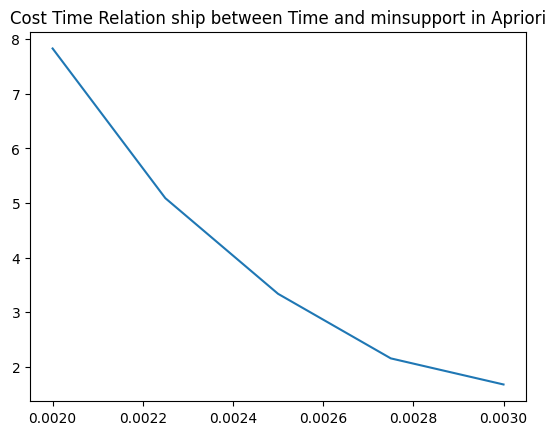

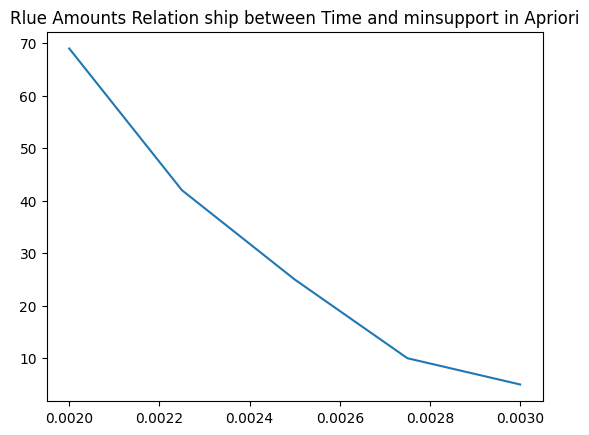

In [16]:
import matplotlib.pyplot as plt

plt.title("Cost Time Relation ship between Time and minsupport in Apriori")
plt.plot(percentile, totle_time)
plt.show()

plt.title("Rlue Amounts Relation ship between Time and minsupport in Apriori")
plt.plot(percentile, rules_cnt)
plt.show()

In [17]:
# Apriori for min_threshold
from time import time
from mlxtend.frequent_patterns import association_rules

save = False

min_threshold = [0.5, 0.6, 0.7, 0.8, 0.9]
totle_time = [0, 0, 0, 0, 0]
rules_cnt = [0, 0, 0, 0, 0]
for k in range(5):
    s_time = time()
    freq_itemsets = apriori(result_df, min_support=2.5e-3, use_colnames=True)

    # 檢查冗餘規則
    rules = association_rules(freq_itemsets, min_threshold=min_threshold[k])

    redundant_rules = set()
    for i in range(len(rules)):
        for j in range(i+1, len(rules)):
            if rules.iloc[i]['antecedents'].issubset(rules.iloc[j]['antecedents']) and \
            rules.iloc[i]['consequents'] == rules.iloc[j]['consequents']:
                redundant_rules.add(rules.iloc[i].name)

    filtered_rules = rules.drop(index=redundant_rules)
    e_time = time()

    if save:
        filtered_rules.to_csv("filtered_rules.csv")
        
    rules_cnt[k] = len(filtered_rules)
    totle_time[k] = e_time - s_time

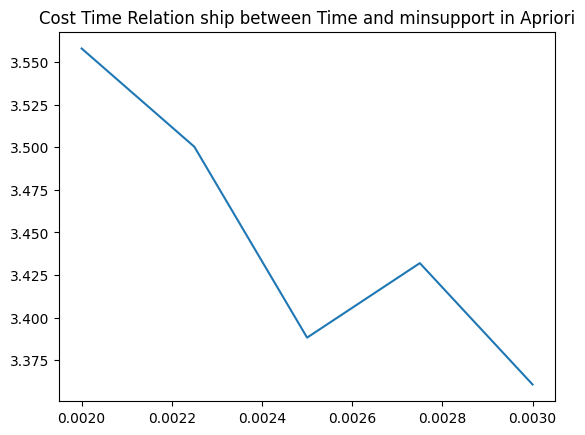

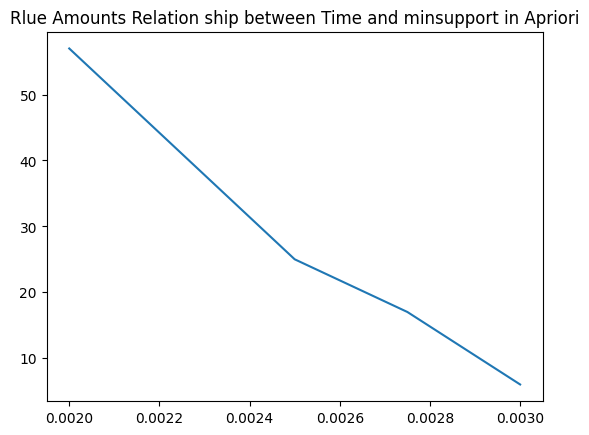

In [18]:
import matplotlib.pyplot as plt

plt.title("Cost Time Relation ship between Time and minsupport in Apriori")
plt.plot(percentile, totle_time)
plt.show()

plt.title("Rlue Amounts Relation ship between Time and minsupport in Apriori")
plt.plot(percentile, rules_cnt)
plt.show()

In [19]:
# FP-growth for min support
from time import time
from mlxtend.frequent_patterns import association_rules

save = True

percentile = [2e-3, 2.25e-3, 2.5e-3, 2.75e-3, 3e-3]
totle_time = [0, 0, 0, 0, 0]
rules_cnt = [0, 0, 0, 0, 0]
for k in range(5):
    s_time = time()
    freq_itemsets = fpgrowth(result_df, min_support=percentile[k], use_colnames=True)

    # 檢查冗餘規則
    rules = association_rules(freq_itemsets, min_threshold=0.7)

    redundant_rules = set()
    for i in range(len(rules)):
        for j in range(i+1, len(rules)):
            if rules.iloc[i]['antecedents'].issubset(rules.iloc[j]['antecedents']) and \
            rules.iloc[i]['consequents'] == rules.iloc[j]['consequents']:
                redundant_rules.add(rules.iloc[i].name)

    filtered_rules = rules.drop(index=redundant_rules)
    e_time = time()

    if save:
        filtered_rules.to_csv(f"filtered_rules_FP_{k}.csv", index=False)
    rules_cnt[k] = len(filtered_rules)
    totle_time[k] = e_time - s_time

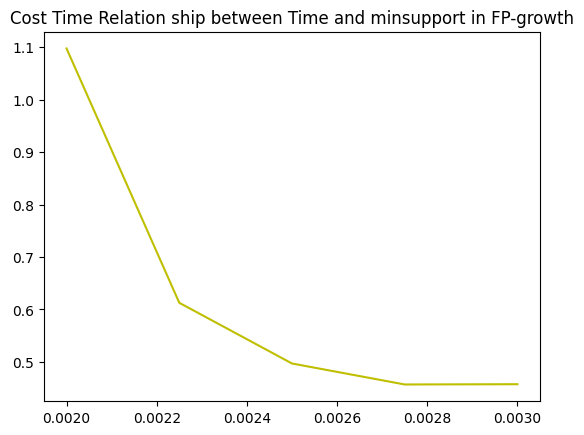

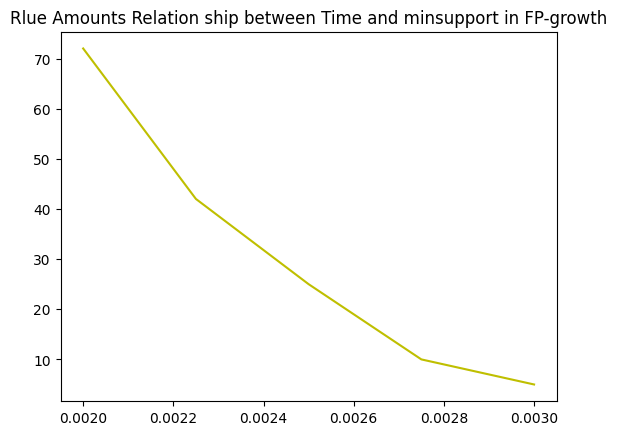

In [20]:
import matplotlib.pyplot as plt

plt.title("Cost Time Relation ship between Time and minsupport in FP-growth")
plt.plot(percentile, totle_time, color='y')
plt.show()

plt.title("Rlue Amounts Relation ship between Time and minsupport in FP-growth")
plt.plot(percentile, rules_cnt, color='y')
plt.show()

In [21]:
# FP-growth for min_threshold
from time import time
from mlxtend.frequent_patterns import association_rules

save = True

min_threshold = [0.5, 0.6, 0.7, 0.8, 0.9]
totle_time = [0, 0, 0, 0, 0]
rules_cnt = [0, 0, 0, 0, 0]
for k in range(5):
    s_time = time()
    freq_itemsets = fpgrowth(result_df, min_support=2.5e-3, use_colnames=True)

    # 檢查冗餘規則
    rules = association_rules(freq_itemsets, min_threshold=min_threshold[k])

    redundant_rules = set()
    for i in range(len(rules)):
        for j in range(i+1, len(rules)):
            if rules.iloc[i]['antecedents'].issubset(rules.iloc[j]['antecedents']) and \
            rules.iloc[i]['consequents'] == rules.iloc[j]['consequents']:
                redundant_rules.add(rules.iloc[i].name)

    filtered_rules = rules.drop(index=redundant_rules)
    e_time = time()

    if save:
        filtered_rules.to_csv(f"filtered_rules_FP_th_{k}.csv", index=False)
        
    rules_cnt[k] = len(filtered_rules)
    totle_time[k] = e_time - s_time

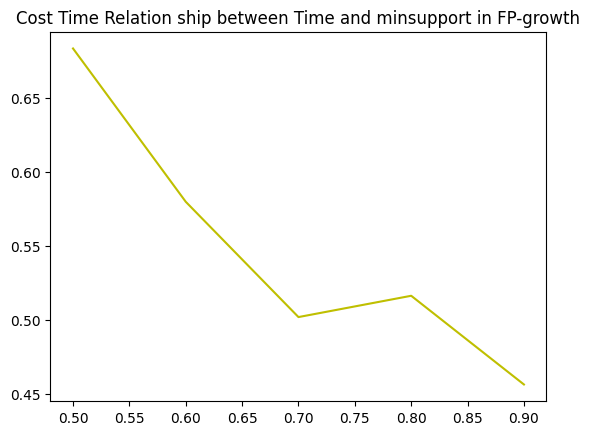

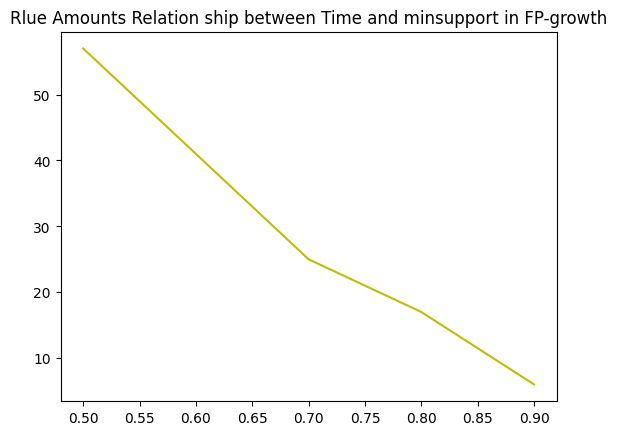

In [22]:
import matplotlib.pyplot as plt

plt.title("Cost Time Relation ship between Time and minsupport in FP-growth")
plt.plot(min_threshold, totle_time, color='y')
plt.show()

plt.title("Rlue Amounts Relation ship between Time and minsupport in FP-growth")
plt.plot(min_threshold, rules_cnt, color='y')
plt.show()

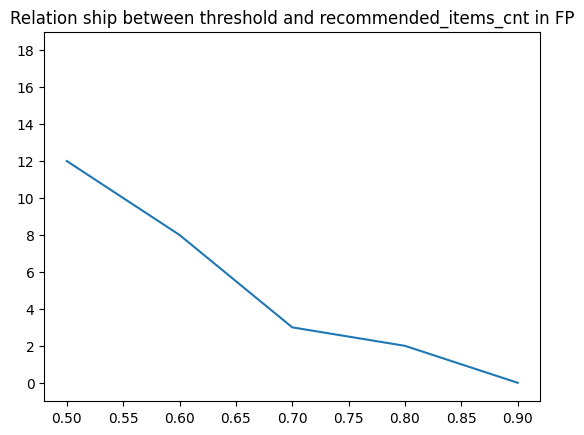

In [23]:
from mlxtend.frequent_patterns import association_rules
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator
# 讀取rules
min_threshold = [0.5, 0.6, 0.7, 0.8, 0.9]
recommended_items_cnt = [0, 0, 0, 0, 0]
for k in range(5):
    rules = pd.read_csv(f"filtered_rules_FP_th_{k}.csv")

    target_items = ['BAV99,215']

    # 查找前提包含所有目標商品的規則
    target_rules = rules[rules['antecedents'].apply(lambda x: all(item in x for item in target_items))]

    # 從這些規則中提取推薦的商品
    recommended_items = target_rules['consequents'].apply(lambda x: list(x))

    v = recommended_items.values
    recommended_items_cnt[k] = len(v)

plt.ylim(-1, 19)
y_m = MultipleLocator(2)
ax = plt.gca()
ax.yaxis.set_major_locator(y_m)
plt.title("Relation ship between threshold and recommended_items_cnt in FP")
plt.plot(min_threshold, recommended_items_cnt)
plt.show()

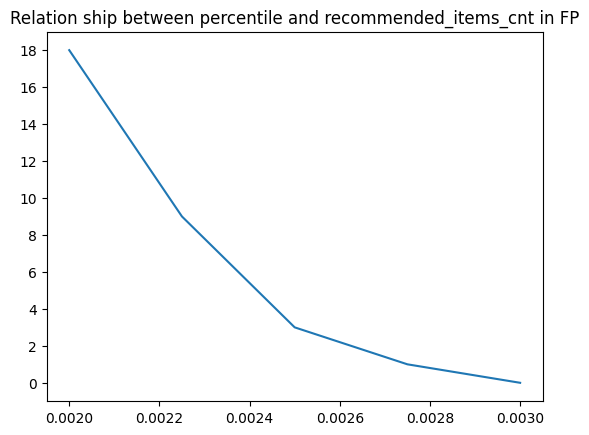

In [24]:
from mlxtend.frequent_patterns import association_rules
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator
# 讀取rules
percentile = [2e-3, 2.25e-3, 2.5e-3, 2.75e-3, 3e-3]
recommended_items_cnt = [0, 0, 0, 0, 0]
for k in range(5):
    rules = pd.read_csv(f"filtered_rules_FP_{k}.csv")

    target_items = ['BAV99,215']

    # 查找前提包含所有目標商品的規則
    target_rules = rules[rules['antecedents'].apply(lambda x: all(item in x for item in target_items))]

    # 從這些規則中提取推薦的商品
    recommended_items = target_rules['consequents'].apply(lambda x: list(x))

    v = recommended_items.values
    recommended_items_cnt[k] = len(v)

plt.ylim(-1, 19)
y_m = MultipleLocator(2)
ax = plt.gca()
ax.yaxis.set_major_locator(y_m)
plt.title("Relation ship between percentile and recommended_items_cnt in FP")
plt.plot(percentile, recommended_items_cnt)
plt.show()

In [25]:
from mlxtend.frequent_patterns import association_rules
import pandas as pd
# 讀取rules
rules = pd.read_csv("filtered_rules_FP_0.csv")

target_items = []
print("輸入您的購買清單(輸入-開始分析):")
while(True):
    user_input = input()
    if user_input == '-':
        break
    else:
        target_items.append(user_input)

# 查找前提包含所有目標商品的規則
target_rules = rules[rules['antecedents'].apply(lambda x: all(item in x for item in target_items))]

# 從這些規則中提取推薦的商品
recommended_items = target_rules['consequents'].apply(lambda x: list(x))

cont = []
v = recommended_items.values
result = ""
for i in range(len(v)):
    f = False
    c = ""
    for j in range(len(v[i])):
        if not f and v[i][j] == "'":
            f = True
        elif f and v[i][j] == "'":
            f = False
            break
        elif f:
            c += v[i][j]
    if c not in cont:
        cont.append(c)
        result += c
        if i != len(v) - 1:
            result += "和"

if result[-1] == "和":
    result = result[:-1]
print("根據輸入商品", target_items, "推薦的商品有:")
print(result)

輸入您的購買清單(輸入-開始分析):
根據輸入商品 ['BAS316,115', 'BAV99,215', 'PDZ15B,115'] 推薦的商品有:
PDZ12B,115和PDZ13B,115
